In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models, regularizers
from tensorflow.keras.layers import *

print(tf.version.VERSION)

2.12.0


In [2]:
# untar
!tar -xvzf dataset.tar.gz
# load train
train_images = pickle.load(open('train_images.pkl', 'rb'))
train_labels = pickle.load(open('train_labels.pkl', 'rb'))
# load val
val_images = pickle.load(open('val_images.pkl', 'rb'))
val_labels = pickle.load(open('val_labels.pkl', 'rb'))

train_images.pkl
train_labels.pkl
val_images.pkl
val_labels.pkl


In [7]:
# Define the neural network architecture (don't change this)

model = models.Sequential()
model.add(Conv2D(32, (3, 3), padding='same', kernel_regularizer=regularizers.l2(1e-5), input_shape=(25,25,3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), kernel_regularizer=regularizers.l2(1e-5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=regularizers.l2(1e-5)))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), kernel_regularizer=regularizers.l2(1e-5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(5))
model.add(Activation('softmax'))

In [4]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        896       
                                                                 
 activation (Activation)     (None, 25, 25, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 23, 23, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                        

In [9]:
# you can use the default hyper-parameters for training, 
# val accuracy ~72% after 50 epochs
from tensorflow.keras.callbacks import ModelCheckpoint


checkpoint_path = "unpruned.h5"
checkpoint = ModelCheckpoint(
    checkpoint_path, 
    monitor="val_accuracy",
    verbose=1,
    save_best_only=True,
    mode="max"
)

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001, weight_decay=1e-6),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, batch_size=32, epochs=200, 
                    validation_data=(val_images, val_labels), callbacks=[checkpoint]) # train for 200 epochs, with batch size 32

Epoch 1/200
701/703 [============================>.] - ETA: 0s - loss: 1.5215 - accuracy: 0.3045
Epoch 1: val_accuracy improved from -inf to 0.40238, saving model to unpruned.h5
703/703 [==============================] - 6s 6ms/step - loss: 1.5212 - accuracy: 0.3048 - val_loss: 1.3702 - val_accuracy: 0.4024
Epoch 2/200
700/703 [============================>.] - ETA: 0s - loss: 1.3560 - accuracy: 0.4172
Epoch 2: val_accuracy improved from 0.40238 to 0.46970, saving model to unpruned.h5
703/703 [==============================] - 4s 5ms/step - loss: 1.3558 - accuracy: 0.4174 - val_loss: 1.2660 - val_accuracy: 0.4697
Epoch 3/200
696/703 [============================>.] - ETA: 0s - loss: 1.2771 - accuracy: 0.4601
Epoch 3: val_accuracy improved from 0.46970 to 0.49188, saving model to unpruned.h5
703/703 [==============================] - 4s 5ms/step - loss: 1.2768 - accuracy: 0.4604 - val_loss: 1.2204 - val_accuracy: 0.4919
Epoch 4/200
697/703 [============================>.] - ETA: 0s - lo

In [10]:
results = model.evaluate(val_images, val_labels, batch_size=128)

20/20 [==============================] - 0s 7ms/step - loss: 0.8698 - accuracy: 0.7493


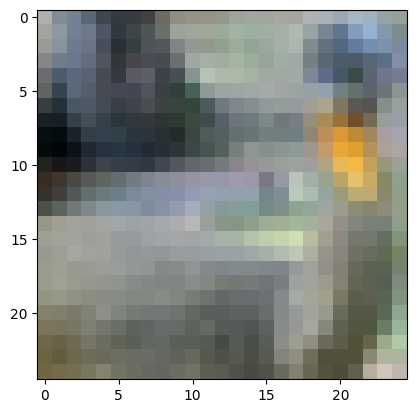

In [16]:
# viewing a sample train image and its corresponding label
import matplotlib.pyplot as plt

%matplotlib inline

img = train_images[10]
imgplot = plt.imshow(img)
plt.show()

In [17]:
print(f"Label: {train_labels[10]}")

Label: [0]


In [20]:
np.unique(train_labels)

array([0, 1, 2, 3, 4])